# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [87]:
# Alfabet jawny i szyfrowy 
alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

alphabet_size = 26

plaintext = "Zorro fly zealotry zipper"

ciphertext = ""

key = 15 #przesunięcie permutacji czyli klucz szyfrowania 

print("Tekst jawny: ", plaintext)

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + alphabets[(alphabets.index(char) + key) % alphabet_size] 
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

decodedtext = ""
for text in ciphertext:
    for char in text:
        decodedtext = decodedtext + alphabets[(alphabets.index(char)- key) % alphabet_size]
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
##### 1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
**Odp:** Potrzeba tyle prób, ile liter ma alfabet, przy pomocy którego zapisana została wiadomość. Jest tak dlatego, że w szyfrze Cezara każda litera zaszyfrowanej wiadomości jest przesunięta o tyle samo pozycji w alfabecie. Wystarczy więc sprawdzić wszystkie możliwe przesunięcia, a jest ich tyle, co liter w alfabecie (dla przesunięcia wynoszącego 0, zaszyfrowana wiadomość jest taka sama jak wiadomość wyjściowa).

<br>

##### 2. Co to jest atak siłowy (__brute force__)? 
**Odp:** Jest to atak, w którym sprawdzane są wszystkie możliwości. W przypadku szyfru Cezara, atak brute force polegałby na sprawdzeniu wszystkich możliwych przesunięć liter alfabetu.

<br>

##### 3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?  
**Odp 1:** Szyfr Cezara z zastosowaniem klucza, określającego przesunięcie o inną różne przesunięcie dla kolejnych liter szyfrowanej wiadomości.

**Odp 2:** Szyfr Vinegere'a - wykorzystywana jest tablica kwadratowa, w której każdy wiersz zawiera kolejne litery alfabetu przesunięte o inną ilość pozycji (w każdym kolejnym wierszu litery są przesunięte o 1 pozycję w lewo względem poprzedniego). Potrzebny jest klucz (tym razem klucz jest tekstem, zbudowanym przy pomocy tego samego alfabetu, co szyfrowana wiadomość) o długości równej długości szyfrowanej wiadomości. Następnie, dla kolejnych par liter, stojących na odpowiednio tych samych pozycjach szyfrowanej wiadomości i klucza, wyznaczana jest litera z tablicy, jako przecięcie kolumny, wyznaczonej przy pomocy litery z szyfrowanego tekstu i wiersza, wyznaczonego przy pomocy litery z klucza.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Vigen%C3%A8re_square_shading.svg/800px-Vigen%C3%A8re_square_shading.svg.png?1665846425974" width="500px" />

Aby odszyfrować wiadomość, trzeba znaleźć wiersz, który odpowiada danej literze klucza, przy pomocy którego zaszyfrowana została wiadomość. Następnie, w tym wierszu należy znaleźć położenie litery z zaszyfrowanej wiadomości, stojącej na tej samej pozycji, co litera z klucza, odpowiadająca danemu wierszowi. Litera przypisana kolumnie, w której znajduje się znaleziona litera z zaszyfrowanej wiadomości, odpowiada literze z wyjściowej wiadomości (tej, która została zaszyfrowana).

<br>

##### 4. Oceń koszt ataku na ten wariant Cezara.
**Odp 1:** W przypadku pierwszego wariantu, w którym korzystamy tylko z różnego przesunięcia dla kolejnych liter alfabetu, konieczne będzie wykonanie $L^n$ prób, gdzie $L$ - jest długością alfabetu, a $n$ - długością szyfrowanej wiadomości.

**Odp 2:** Koszt jest taki sam, jak w poprzednim algorytmie, ponieważ konieczne jest sprawdzenie wszystkich możliwych kluczy, a na każdej pozcyji klucza może znajdować się jedna z liter alfabetu.

#### Rozwiązania implementacyjne

**Odp 1:** Szyfr Cezara z $n$-elementowym kluczem

In [88]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

def caesar_init(alphabet):
    positions = { k: i for i, k in enumerate(alphabet) }
    
    def encrypt(text, key):
        result = []
        for i, char in enumerate(text):
            offset = key[i % len(key)]
            if char in positions:
                result.append(alphabet[(positions[char] + offset) % len(alphabet)])
            else:
                result.append(char)
        return ''.join(result)
            
    def decrypt(encrypted_text, key):
        result = []
        for i, char in enumerate(encrypted_text):
            offset = key[i % len(key)]
            if char in positions:
                result.append(alphabet[positions[char] - offset])
            else:
                result.append(char)
        return ''.join(result)
        
    return encrypt, decrypt

encrypt, decrypt = caesar_init(alphabet)

In [89]:
plain_text = 'ala ma kota'
key = [1, 5, 8, 4, 22, 11, 14, 17, 2, 7, 0]

encrypted = encrypt(plain_text, key)
decrypted = decrypt(encrypted, key)

print('Encrypted:', encrypted)
print('Decrypted:', decrypted)
print('Is ok?:', plain_text == decrypted)

Encrypted: bqi il bqaa
Decrypted: ala ma kota
Is ok?: True


**Odp 2:** Szyfr Vinegere'a

In [90]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

def vinegere_init(alphabet):
    positions = { k: i for i, k in enumerate(alphabet) }
    
    def encrypt(text, key):
        result = []
        for i, char in enumerate(text):
            offset = positions[key[i % len(key)]]
            if char in positions:
                result.append(alphabet[(positions[char] + offset) % len(alphabet)])
            else:
                result.append(char)
        return ''.join(result)
            
    def decrypt(encrypted_text, key):
        result = []
        for i, char in enumerate(encrypted_text):
            offset = positions[key[i % len(key)]]
            if char in positions:
                result.append(alphabet[positions[char] - offset])
            else:
                result.append(char)
        return ''.join(result)
        
    return encrypt, decrypt

encrypt, decrypt = vinegere_init(alphabet)

In [91]:
plain_text = 'ala ma kota'
key = "piesmaale"

encrypted = encrypt(plain_text, key)
decrypted = decrypt(encrypted, key)

print('Encrypted:', encrypted)
print('Decrypted:', decrypted)
print('Is ok?:', plain_text == decrypted)

Encrypted: pte ya vsii
Decrypted: ala ma kota
Is ok?: True


### Zadanie samodzielne dla studentów
1. Napisz ,,ulepszony szyfr Cezara'' czyli monoalfabetyczny szyfr z tajną pemutacją alfabetu szyfrowego
2. Można wykorzystać funkcję random.permutation() z biblioteki numpy

In [92]:
# lepszy Cezar
# Wyjaśnienie, czym są szyfry permutacyjne: https://www.youtube.com/watch?v=tgWr-PS4UIU
import numpy as np

alphabet = "abcdefghijklmnopqrstuvwxyz"

def permutation_caesar_init(alphabet):
    secret_alphabet = ''.join(np.random.permutation(list(alphabet)))
    positions = { k: i for i, k in enumerate(secret_alphabet) }
    
    def encrypt(text, key):
        return ''.join([secret_alphabet[(positions[char] + key) % len(alphabet)] 
                        if char in positions else char for char in text])
            
    def decrypt(encrypted_text, key):
        return ''.join([secret_alphabet[(positions[char] - key)] 
                        if char in positions else char for char in encrypted_text])
    
    return encrypt, decrypt

encrypt, decrypt = permutation_caesar_init(alphabet)

plain_text = "zorro fly zealotry zipper"
key = 3

encrypted = encrypt(plain_text, key)
decrypted = decrypt(encrypted, key)

print('Encrypted:', encrypted)
print('Decrypted:', decrypted)
print('Is ok?:', plain_text == decrypted)

Encrypted: hsvvs ryk hzqysovk hniizv
Decrypted: zorro fly zealotry zipper
Is ok?: True


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

### Zadanie samodzielne dla studentów
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

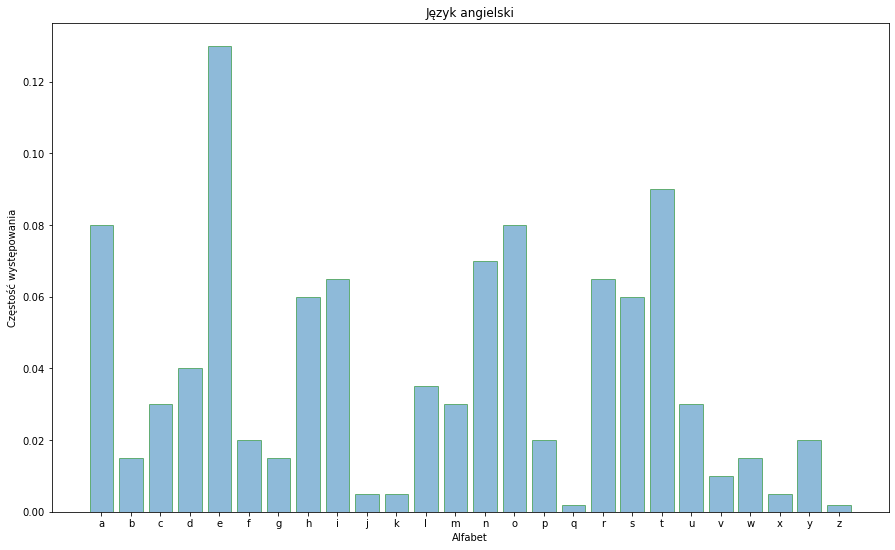

In [93]:
from matplotlib import pyplot as plt
import numpy as np

letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej. 

In [99]:
import numpy as np
from matplotlib import pyplot as plt

plain_text = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]

# policz częstość i wyświetl rozkłady
from collections import defaultdict

def count_frequency(text):
    counts = defaultdict(int)
    for char in text:
        counts[char] += 1
    return dict(counts)

def caesar_init(alphabet):
    positions = { k: i for i, k in enumerate(alphabet) }
    
    def encrypt(text, key):
        return ''.join([alphabet[(positions[char] + key) % len(alphabet)] 
                        if char in positions else char
                        for char in text.lower()])
            
    def decrypt(encrypted_text, key):
                return ''.join([alphabet[(positions[char] - key) % len(alphabet)] 
                        if char in positions else char
                        for char in text])
        
    return encrypt, decrypt

def draw_frequency_chart(text, alphabet):
    counts = count_frequency(text)
    frequencies = [counts[letter] if letter in counts else 0 for letter in alphabet]
    labels = np.arange(len(alphabet))
    plt.figure(figsize=(15,9))
    plt.bar(labels, frequencies, alpha=0.5, edgecolor="green")
    plt.xlabel('Alfabet')
    plt.xticks(np.arange(len(alphabet)), alphabet)
    plt.title("Język angielski");
    plt.ylabel('Częstość występowania')
    plt.show()

Plain text:     TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem


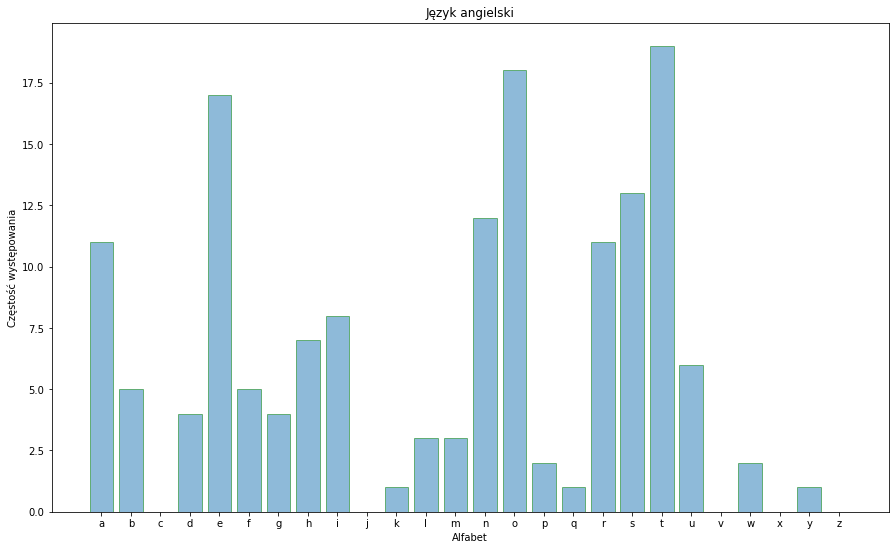

In [126]:
plain_text_lower = plain_text.lower()
print('Plain text:    ', plain_text)
draw_frequency_chart(plain_text_lower, alphabet)

Encrypted text: wrehruqrwwrehwkdwlvwkhtxhvwlrqzkhwkhuwlvqreohulqwkhplqgwrvxiihuwkhvolqjvdqgduurzvrirxwudjhrxviruwxqhruwrwdnhdupvdjdlqvwdvhdriwurxeohvdqgebrssrvlqjhqgwkhp


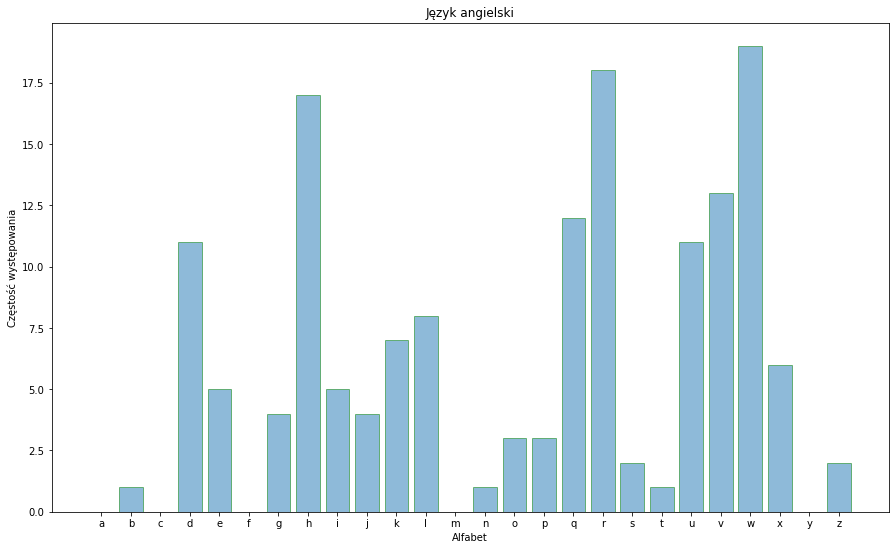

In [127]:
encrypt, decrypt = caesar_init(alphabet)
key = 3
encrypted_text = encrypt(plain_text_lower, key)
print('Encrypted text:', encrypted_text)
draw_frequency_chart(encrypted_text, alphabet)

3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

Encrypted text: dkqfkjbkddkqfdtvdaidtfhlfidakbgtfdtfjdaibkqcfjabdtfrabzdkilmmfjdtficabsivbzvjjkgikmkldjvsfklimkjdlbfkjdkdvefvjrivsvabidvifvkmdjklqcfivbzqwknnkiabsfbzdtfr


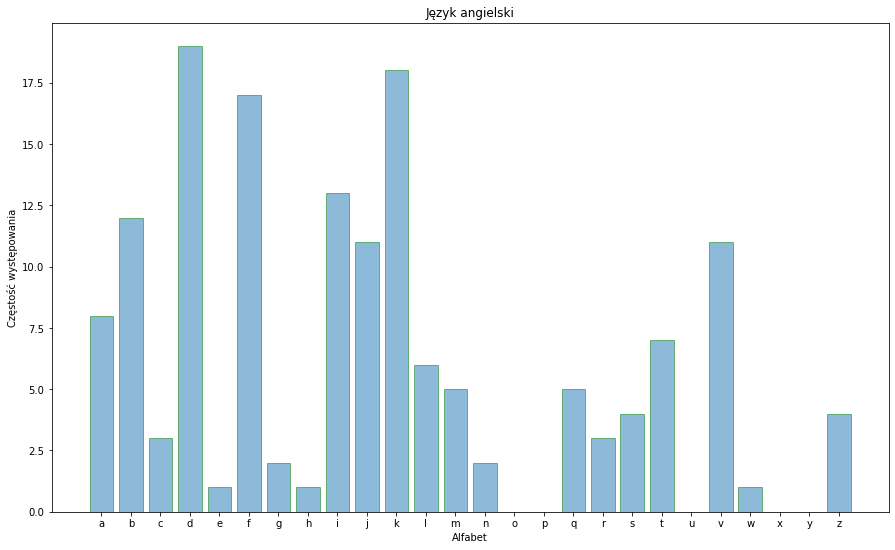

In [143]:
encrypt, decrypt = permutation_caesar_init(alphabet)
key = 3
encrypted_text = encrypt(plain_text_lower, key)
print('Encrypted text:', encrypted_text)
draw_frequency_chart(encrypted_text, alphabet)

### Ciekawostka: 
Automatyczna kryptoanaliza tekst zaszyfrowanego zwykłym Cezarem

In [144]:
!pip install nltk 
import nltk
nltk.download('words')
from nltk.corpus import words


unique = []
frequency = []
psi = []
key = 0
value = 0.0
exit = True

ciphertext = "odggd".lower()

alphabets = "abcdefghijklmnopqrstuvwxyz"

english_frequency_prob = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 
                          0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 
                          0.030, 0.010, 0.015, 0.005, 0.020, 0.002]



for char in ciphertext: #lista liter w szyfrogramie
    if (char not in unique) and (char.isalpha()):
        unique.append(char)
        
only_alphabets = [char for char in ciphertext if char.isalpha()]  #tylko litery

for unique_char in unique: #częstość liter w tekście 
     frequency.append(ciphertext.count(unique_char) / float(len(only_alphabets)))

for i in range(0,26): #oblicz dopasowanie
    for unique_char in unique:
         value = value + frequency[unique.index(unique_char)] * english_frequency_prob[alphabets.index(unique_char) - i]
    psi.append(value)  
    value = 0.0
    
sorted_psi = psi[:] # sortuj dopasowanie
sorted_psi.sort(reverse=True)

decoded_string = ""
for i in range(0, 26):
    key = psi.index(sorted_psi[i])
    decoded_string = ""
    for char in ciphertext:
        if (char != ' '):
            decoded_string = decoded_string + alphabets[alphabets.index(char) - key]
        else:
            decoded_string = decoded_string + " "
            
    print("Próba klucza: ", key, " ....", decoded_string)
    
    for word in decoded_string.split():
        if word not in words.words(): #czy szyfrowanie ma sens
            exit = False
        else:
            exit = True
    if exit:
        break
        
print("\n", "Decoded string: ", decoded_string)

[nltk_data] Downloading package words to /Users/mateu/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Próba klucza:  25  .... pehhe
Próba klucza:  10  .... etwwt
Próba klucza:  2  .... mbeeb
Próba klucza:  15  .... zorro

 Decoded string:  zorro


## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

### Zadanie samodzielne dla studentów

In [148]:
plain_text = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"
key = "klucz"

1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekstu jawnego?_

Przykładem takiego algorytmu jest algorytm Vigenere'a (implementacja wyżej). Poza tekstem jawnym, potrzebny jest klucz szyfrowania oraz znajomość relacji liter z szyfrowanego tekstu i klucza. W przypadku szyfru Vigenere'a, wykorzystuje się do tego celu tabelę (również opisana wcześniej).

2. Dokonaj analizy częstościowej szyfrogramu zaszyfrowanego szyfrem Vigenera

Encrypted text: dzvgnbyivsymyvgkecusrpkwdcecqmgsyvgocnkrxzvndbthvgoxcpcdzmwepplvgodfkmqdupckclqvczzqtdcuidyfmhnbeopdycnqskvycqwduizsymvzcpuqedciwavpmcmnmsqozzmkmqphfsrpg


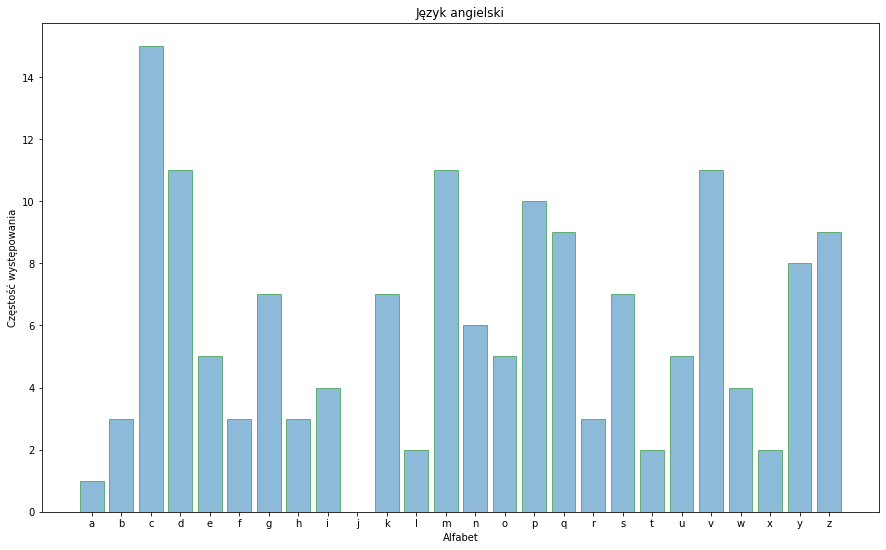

In [152]:
encrypt, decrypt = vinegere_init(alphabet)
encrypted_text = encrypt(plain_text_lower, key)
print('Encrypted text:', encrypted_text)
draw_frequency_chart(encrypted_text, alphabet)

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogramu.

**Odp:** Inaczej niż histogram zaszyfrowanej wiadomości. Jego wygląd jest zależny od użytego algorytmu szyfrowania.

2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.

**Odp:** Im dłuższy klucz, tym zaszyfrowana wiadomość jest trudniejsza do odszyfrowania.

3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy?

**Odp:** Największe bezpieczeństwo zapewnia klucz, który nie zawiera kilkukrotnie powtórzonych tych ciągów tych samych znaków. Powtarzanie klucza może być przydatne do zauważenia wad szyfru, dlatego można je wykorzystywać dla potrzeb kryptoanalizy.

4. Jaki klucz gwarantowałby bezpieczeństwo?

**Odp:** Taki, który nie zawiera wielu powtórzonych ciągów tych samych znaków.

5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

**Odp:** Rozkład, w którym częstość występowania wszystkich liter jest taka sama. (? nie mam pewności)

### Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 
- klucz użyty do szyfrowania wiadomości jest dłuższy lub tej samej długości, co szyfrowana wiadomość,
- klucz jest wygenerowany w sposób całkowicie losowy (nie istnieje sposób na odtworzenie klucza na podstawie znajmości działania generatorów liczb pseudolosowych),
- klucz nie może być użyty do zaszyfrowania więcej niż jednej wiadomości

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc. 

# TODO